In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize
X,y=load_boston().data,load_boston().target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [2]:
from sklearn.linear_model import LinearRegression as sklearn_lr
model=sklearn_lr().fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)

[-1.31043506e-01  6.04865714e-02  5.94853121e-02  2.15080880e+00
 -1.65687954e+01  3.34100360e+00  4.57797487e-03 -1.58178200e+00
  3.63824569e-01 -1.46189156e-02 -7.86740876e-01  1.07891326e-02
 -6.49490381e-01]
36.687312980258326


In [3]:
model.predict(X_test)[:10]

array([16.62250395, 20.683891  , 27.71880899, 25.18047729, 13.23356249,
       24.33070703, 35.70101566, 22.10780793, 25.32658297, 17.16526335])

### 1.使用Scipy optimize求解线性回归

In [4]:
from scipy.optimize import lsq_linear
class LinearRegression:
    def fit(self,X,y):
        _,n=np.shape(X)
        X=np.insert(X,n,1,axis=1)          #将X新增一列为1的列向量
        A = X
        b = y
        res = lsq_linear(A, b, lsmr_tol='auto', verbose=1)
        self.coef_=res.x[:-1]
        self.intercept_=res.x[-1]
        self.res=res
        return self
    def predict(self,X):
        return np.array(X@self.coef_.reshape(-1,1)+self.intercept_).flatten()
           
model=LinearRegression().fit(X_train,y_train)
model.predict(X_test)[:5]

The unconstrained solution is optimal.
Final cost 3.7978e+03, first-order optimality 1.41e-09


array([16.62250395, 20.683891  , 27.71880899, 25.18047729, 13.23356249])

### 2.使用Scipy求解带L2正则化的线性回归

In [5]:
def loss(w,X,y,c=0.1):
    _,n=np.shape(X)
    X=np.insert(X,n,1,axis=1)          #将X新增一列为1的列向量                                                 
    loss=np.square(y-X@w).sum()+c*np.square(w[:-1]).sum()    #minmize ||y - Xw||^2_2 + alpha * ||w||^2_2
    return loss

In [6]:
class Ridge:
    def __init__(self,c=0.0001):
        self.c=c
    def fit(self,X,y):
        init_w=np.random.randn(X.shape[1]+1)
        res=minimize(loss,init_w,args=(X,y))
        self.coef_=res.x[:-1]
        self.intercept_=res.x[-1]
        return self
    def predict(self,X):
        pred=X@self.coef_.T+self.intercept_
        regularization=self.c*self.coef_.T@self.coef_
        return pred+regularization
model=Ridge().fit(X_train,y_train)
pre=model.predict(X_test)
pre[:10]

array([16.73548868, 20.72175151, 27.77544506, 25.09242262, 13.56257664,
       24.22003259, 35.76556953, 22.03303312, 25.37807893, 17.1520344 ])

In [7]:
from sklearn.linear_model import Ridge as sklearn_Ridge
model=sklearn_Ridge(alpha=0.0001).fit(X_train,y_train)
pre2=model.predict(X_test)
pre2[:10]

array([16.62260136, 20.68390587, 27.71884428, 25.18035379, 13.23389745,
       24.33055799, 35.70106005, 22.10769835, 25.32661262, 17.16522178])

### 3.使用梯度下降法求解线性回归

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
class LinearRegression:
    def __init__(self,learning_rate=0.03,max_iters=50):
        self.learning_rate=learning_rate
        self.max_iters=max_iters
    def fit(self,X,y):
        m,n=np.shape(X)
        X=np.insert(X,n,1,axis=1)          #将X新增一列为1的列向量
        W=np.random.randn(X.shape[1])
        loss_series=[]
        for i in range(self.max_iters):
            error=X@W.T-y
            grad=(2*X.T@error)/m
            W=W-self.learning_rate*grad  #更新权重
            current_loss=np.square(error).sum()/m
            loss_series.append(current_loss)
        plt.plot(range(self.max_iters),loss_series,color='black')
        plt.xlabel('The number of iterations')
        plt.ylabel('The mean square error')
        self.W=W
        self.coef_=W[:-1]
        self.intercept=W[:-1]
        
        return self
    def predict(self,X):
        X_=np.full(shape=(X.shape[0],1),fill_value=1)
        X=np.concatenate([X,X_],axis=1)
        pre=X@self.W.T
        return pre

4.6221953774663486e-05

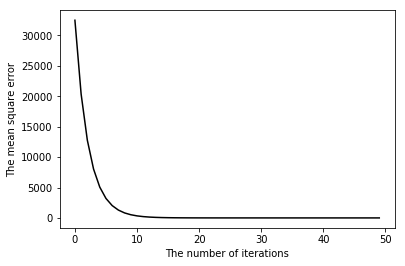

In [9]:
from sklearn.datasets import make_regression
X,y=make_regression(n_features=10,n_samples=1000)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
lr=LinearRegression(learning_rate=0.1).fit(X_train,y_train)
mean_squared_error(y_test,lr.predict(X_test))